In [4]:
%load_ext autoreload
%autoreload 2

import os 
import sys

# project_dir_path = '/home/onoue/ws/lukasiewicz_1'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_1/'
sys.path.append(project_dir_path)

print(sys.path)


from src.setup_problem_primal_modular import Setup
# from src.objective_function import specimen_construct_objective_function
# from src.objective_function import specimen_construct_objective_function_loss_v1
# from src.objective_function import specimen_construct_objective_function_loss_v2
# from src.objective_function import specimen_construct_objective_function_loss_v3
from src.objective_function import linear_svm
from src.misc import visualize_result

import cvxpy as cp

from src.misc import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/Users/keisukeonoue/ws/lukasiewicz_1/notebooks/toy_problem', '/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.6_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages', '/home/onoue/ws/lukasiewicz_1', '/Users/keisukeonoue/ws/lukasiewicz_1/', '/Users/keisukeonoue/ws/lukasiewicz_1/']


load_data took 0.04074978828430176 seconds!
load_rules took 0.0003070831298828125 seconds!
linear_svm took 0.0011830329895019531 seconds!
pointwise constraints
logical constraints
consistency constraints
__call__ took 0.006443023681640625 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 12 03:23:05 PM: Your problem has 23 variables, 96 constraints, and 0 parameters.
(CVXPY) Jan 12 03:23:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 12 03:23:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 12 03:23:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                              

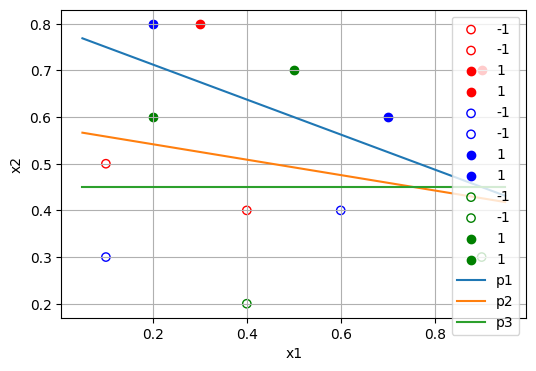

In [6]:
file_names_dict = {
    "supervised": ["L_p1.csv", "L_p2.csv", "L_p3.csv"],
    "unsupervised": ["U.csv"],
    "rule": ["rules.txt"]
}

data_dir_path = './../../inputs/toy_data'

problem_instance = Setup(data_dir_path, file_names_dict, linear_svm)
objective, constraints = problem_instance.main(c1=10, c2=10)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)
visualize_result(problem_instance)

load_data took 0.01463937759399414 seconds!
load_rules took 0.0005407333374023438 seconds!
specimen_construct_objective_function_loss_v1 took 0.019290924072265625 seconds!
consistency constraints
__call__ took 0.017100811004638672 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 24 02:13:23 AM: Your problem has 23 variables, 60 constraints, and 0 parameters.
(CVXPY) Dec 24 02:13:23 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 24 02:13:23 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 24 02:13:23 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---

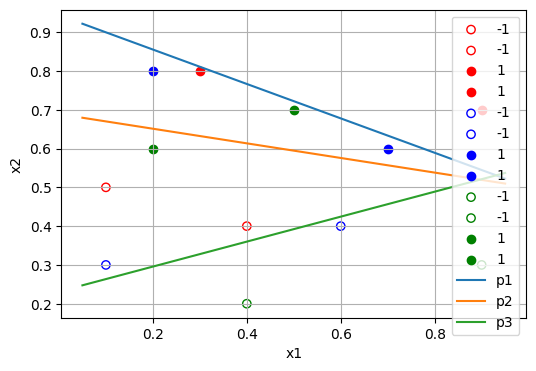

In [11]:
file_names_dict = {
    "supervised": ["L_p1.csv", "L_p2.csv", "L_p3.csv"],
    "unsupervised": ["U.csv"],
    "rule": ["rules.txt"]
}

data_dir_path = './../../inputs/toy_data'

constraints_flag_dict = {
    'pointwise': False,
    'logical': False,
    'consistency': True
}

problem_instance = Setup(data_dir_path, file_names_dict, specimen_construct_objective_function_loss_v1)
objective, constraints = problem_instance.main(c1=10, c2=10, constraints_flag_dict=constraints_flag_dict)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)
visualize_result(problem_instance)

load_data took 0.012750625610351562 seconds!
load_rules took 0.0004830360412597656 seconds!
specimen_construct_objective_function_loss_v2 took 0.01705765724182129 seconds!
consistency constraints
__call__ took 0.01343846321105957 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 24 02:13:33 AM: Your problem has 9 variables, 60 constraints, and 0 parameters.
(CVXPY) Dec 24 02:13:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 24 02:13:33 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 24 02:13:33 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-----

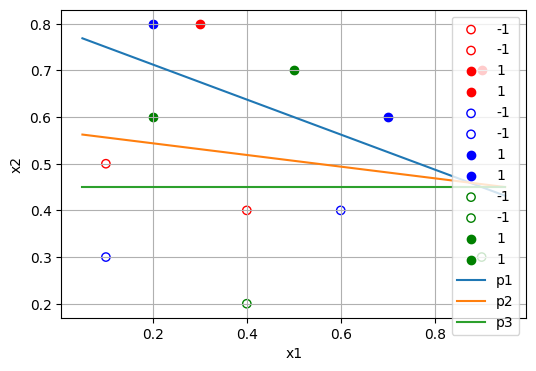

In [12]:
file_names_dict = {
    "supervised": ["L_p1.csv", "L_p2.csv", "L_p3.csv"],
    "unsupervised": ["U.csv"],
    "rule": ["rules.txt"]
}

data_dir_path = './../../inputs/toy_data'

constraints_flag_dict = {
    'pointwise': False,
    'logical': False,
    'consistency': True
}

problem_instance = Setup(data_dir_path, file_names_dict, specimen_construct_objective_function_loss_v2)
objective, constraints = problem_instance.main(c1=10, c2=10, constraints_flag_dict=constraints_flag_dict)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)
visualize_result(problem_instance)

load_data took 0.011420011520385742 seconds!
load_rules took 0.0004737377166748047 seconds!
specimen_construct_objective_function_loss_v3 took 0.008374929428100586 seconds!
consistency constraints
__call__ took 0.018509626388549805 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 24 02:13:40 AM: Your problem has 9 variables, 60 constraints, and 0 parameters.
(CVXPY) Dec 24 02:13:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 24 02:13:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 24 02:13:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---

/home/onoue/ws/lukasiewicz_1/myenv/lib/python3.10/site-packages/cvxpy/atoms/elementwise/log.py:35: RuntimeWarning: invalid value encountered in log
  return np.log(values[0])


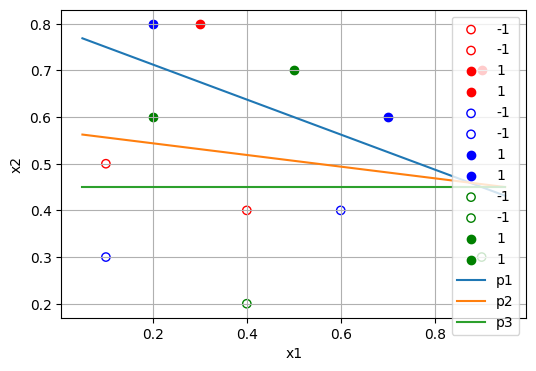

In [13]:
file_names_dict = {
    "supervised": ["L_p1.csv", "L_p2.csv", "L_p3.csv"],
    "unsupervised": ["U.csv"],
    "rule": ["rules.txt"]
}

data_dir_path = './../../inputs/toy_data'

constraints_flag_dict = {
    'pointwise': False,
    'logical': False,
    'consistency': True
}

problem_instance = Setup(data_dir_path, file_names_dict, specimen_construct_objective_function_loss_v3)
objective, constraints = problem_instance.main(c1=10, c2=10, constraints_flag_dict=constraints_flag_dict)

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)
visualize_result(problem_instance)

In [13]:
def test_trained_predicate(predicates_dict, test_data_dict):
    result_dict = {}
    p_names = predicates_dict.keys()

    for p_name in p_names:
        pred_vals = []
        preds = []

        p = predicates_dict[p_name]
        test_data = test_data_dict[p_name]

        cnt = 0

        for data in test_data:
            x, ans = data[:-1], data[-1]
            pred_val = p(x).value
            pred_vals.append(pred_val)

            if (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1):
                cnt += 1

            pred = (pred_val >= 0.5 and ans == 1) or (pred_val < 0.5 and ans == -1)
            preds.append(pred)

        p_arr = np.hstack([test_data, 
                           np.array(pred_vals).reshape(-1,1), 
                           np.array(preds).reshape(-1, 1)])

        result_dict[p_name] = p_arr

        print(cnt)
        print(f'Accuracy of {p_name}: {cnt / len(test_data)}')

    return result_dict

In [7]:
problem_instance.predicates_dict

{'p1(x)': <src.misc.Predicate at 0x7f434f9c7250>,
 'p2(x)': <src.misc.Predicate at 0x7f434f1cbe90>,
 'p3(x)': <src.misc.Predicate at 0x7f434f1e8190>}

In [8]:
problem_instance.L

{'p1(x)': array([[ 0.1,  0.5, -1. ],
        [ 0.4,  0.4, -1. ],
        [ 0.3,  0.8,  1. ],
        [ 0.9,  0.7,  1. ]]),
 'p2(x)': array([[ 0.1,  0.3, -1. ],
        [ 0.6,  0.4, -1. ],
        [ 0.2,  0.8,  1. ],
        [ 0.7,  0.6,  1. ]]),
 'p3(x)': array([[ 0.4,  0.2, -1. ],
        [ 0.9,  0.3, -1. ],
        [ 0.2,  0.6,  1. ],
        [ 0.5,  0.7,  1. ]])}

In [15]:
p_dict = problem_instance.predicates_dict
test_data = problem_instance.L

res_dict = test_trained_predicate(p_dict, test_data)

4
Accuracy of p1(x): 1.0
4
Accuracy of p2(x): 1.0
4
Accuracy of p3(x): 1.0


In [17]:
pd.DataFrame(res_dict['p1(x)'])

,0,1,2,3,4
0,0.1,0.5,-1.0,1.046663e-10,1.0
1,0.4,0.4,-1.0,2.500000e-02,1.0
2,0.3,0.8,1.0,7.500000e-01,1.0
3,0.9,0.7,1.0,1.000000e+00,1.0


In [41]:
cnt = 0
cnt_violation = 0

for data in problem_instance.S:
    for x in data:
        val = problem_instance.predicates_dict['p_1(x)'](x).value

        if val < 0:
            cnt_violation += 1
        print(val)

        cnt += 1

print(f'\n violations: {cnt_violation} out of {cnt}')

1.8977408533515927e-10
0.02202231900646834
0.496573718191177
0.672043493676458
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.26285027551401136
0.12432062345219297
0.4454245659683146
0.43832005137884067
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503
-0.2408279566973171
0.14634294226888722
0.1825742902645291
0.46744688478500873
1.8977408533515927e-10
0.3651485803392841
0.07317147122933065
0.0951937900460248
0.014917804416994529
0.46034237019553503

 violations: 2 out of 30
